In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [44]:
df=pd.read_csv('Cleaned_Pattuvam_historic_data_till_July.csv')
df

,Unnamed: 0,DATE,TIME,RAW WATER FLOW IN ML,CLEAR WATER SUMP LEVEL IN M,CLEAR WATER PUMPING FLOW ML,TREATED WATER PRODUCTION IN ML,REMARKS,DATETIME,Hour,YEAR,MONTH,MONTH-YEAR
0,0,2021-12-01,01:00:00,3.51043,2.84,2.77743,3.39739,No Remarks,2021-12-01 01:00:00,1,2021,12,12-2021
1,1,2021-12-01,02:00:00,3.49087,3.12,2.79467,3.37846,No Remarks,2021-12-01 02:00:00,2,2021,12,12-2021
2,2,2021-12-01,03:00:00,3.50543,3.44,2.79543,3.39256,No Remarks,2021-12-01 03:00:00,3,2021,12,12-2021
3,3,2021-12-01,04:00:00,3.51556,3.72,2.79826,3.40236,No Remarks,2021-12-01 04:00:00,4,2021,12,12-2021
4,4,2021-12-01,05:00:00,3.50732,4.01,2.80887,3.39438,No Remarks,2021-12-01 05:00:00,5,2021,12,12-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23372,23372,2024-07-31,20:00:00,2.62182,2.87,2.89854,2.53740,No Remarks,2024-07-31 20:00:00,20,2024,7,07-2024
23373,23373,2024-07-31,21:00:00,2.58243,2.51,2.89954,2.49928,No Remarks,2024-07-31 21:00:00,21,2024,7,07-2024
23374,23374,2024-07-31,22:00:00,2.55854,2.23,2.86554,2.47616,No Remarks,2024-07-31 22:00:00,22,2024,7,07-2024
23375,23375,2024-07-31,23:00:00,2.56037,1.7,1.95539,2.47793,No Remarks,2024-07-31 23:00:00,23,2024,7,07-2024


In [45]:
df=df[['DATETIME','TREATED WATER PRODUCTION IN ML']]

In [46]:
df.dtypes

DATETIME                           object
TREATED WATER PRODUCTION IN ML    float64
dtype: object

In [47]:
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

/var/folders/cc/_x2lxl0x5rl1ht3z4znf96yh0000gn/T/ipykernel_28274/3960539372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATETIME'] = pd.to_datetime(df['DATETIME'])


In [48]:
df.dtypes

DATETIME                          datetime64[ns]
TREATED WATER PRODUCTION IN ML           float64
dtype: object

In [49]:
df.set_index('DATETIME',inplace=True)

In [50]:
df = df.resample('W')['TREATED WATER PRODUCTION IN ML'].mean()
df = df.reset_index()
df = df.set_index('DATETIME')
df

,TREATED WATER PRODUCTION IN ML
DATETIME,
2021-12-05,2.251238
2021-12-12,2.664468
2021-12-19,2.599488
2021-12-26,2.706296
2022-01-02,2.639030
...,...
2024-07-07,2.990666
2024-07-14,2.882620
2024-07-21,2.251138


In [59]:
# Decompose the time series
decomposition = seasonal_decompose(df['TREATED WATER PRODUCTION IN ML'], model='additive')

# Extracting the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend_variance = trend.var()
seasonal_variance = decomposition.seasonal.var()
residual_variance = residual.var()

total_variance = trend_variance + seasonal_variance + residual_variance

print(f"Trend Variance: {trend_variance / total_variance:.2%}")
print(f"Seasonal Variance: {seasonal_variance / total_variance:.2%}")
print(f"Residual Variance: {residual_variance / total_variance:.2%}")


Trend Variance: 21.39%
Seasonal Variance: 43.65%
Residual Variance: 34.96%


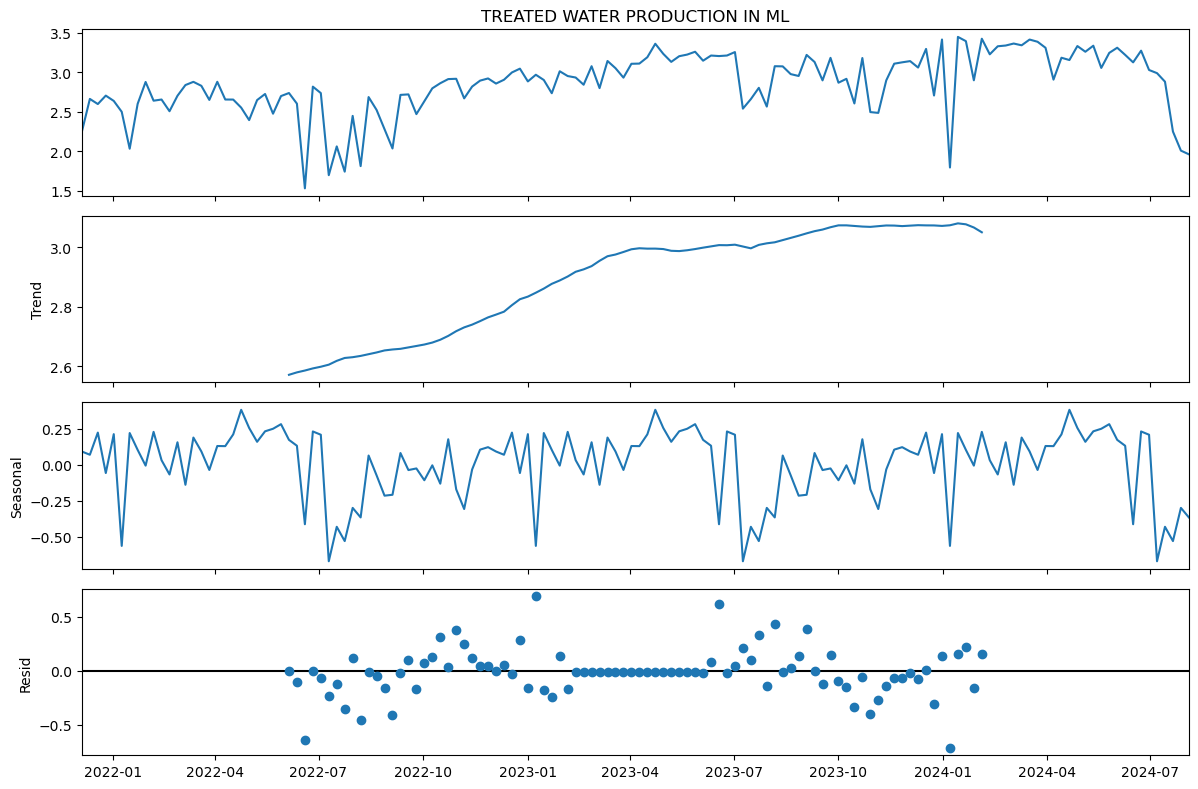

In [51]:
from pylab import rcParams
import matplotlib.pyplot as plt
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8

decomposition = sm.tsa.seasonal_decompose(df['TREATED WATER PRODUCTION IN ML'], model='additive')


fig = decomposition.plot()

plt.show()

In [73]:
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
class TSA:
    def __init__(self,df):
        self.df = df
        
    def adf_test(self,valcol):
        """
        Pass in a time series and an optional title, returns an ADF report
        """
        result = adfuller(self.df[valcol].dropna(),autolag='AIC') # .dropna() handles differenced data
    
        labels = ['ADF test statistic','p-value','# lags used','# observations']
        out = pd.Series(result[0:4],index=labels)

        for key,val in result[4].items():
            out[f'critical value ({key})']=val
        
        print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
        if result[1] <= 0.05:
            print("Strong evidence against the null hypothesis")
            print("Reject the null hypothesis")
            print("Data has no unit root and is stationary")
            state = "Stationary"
        else:
            print("Weak evidence against the null hypothesis")
            print("Fail to reject the null hypothesis")
            print("Data has a unit root and is non-stationary")
            state = "Non-stationary"
        if state == "Stationary":
            return "Yes"
        else:
            return "No"
    def determine_ARIMA_order(self,valcol):
        stepwise_fit = auto_arima(self.df[valcol],start_p=1, start_q=1,max_p=3,max_q=3,trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise
        
#         print(stepwise_fit.summary())
# #         
        best_order = stepwise_fit.get_params().get('order')
        best_seasonal_order = stepwise_fit.get_params().get('seasonal_order')

#         best_order= (1,1,1)
        print('The best order is {}'.format(best_order))
        print('The best seasonal order is {}'.format(best_seasonal_order))

        return best_order
    def fit_model(self,valcol):
#         if len(self.df[valcol]) > 70:
#         train = self.df[valcol][:len(self.df[valcol])-8]
#         test = self.df[valcol][len(self.df[valcol])-8:len(self.df[valcol])-4]
#         val = self.df[valcol][len(self.df[valcol])-4:]
        # Assuming 'valcol' is the column name containing the data
        train = self.df[self.df.index < '2024-01-07'][valcol]
        val = self.df[(self.df.index >= '2024-01-07') & (self.df.index <= '2024-05-05')][valcol]
        test = self.df[self.df.index > '2024-05-05'][valcol]


#             train = self.df[valcol][:len(self.df[valcol])-8]
#             test = self.df[valcol][len(self.df[valcol])-8:len(self.df[valcol])-4]
#             val = self.df[valcol][len(self.df[valcol])-4:]
        start = len(train)
        end = len(train)+len(test)-1
#             print('train : {}'.format(train))
#             print('test : {}'.format(test))
        print('start : {}'.format(start))
        print('end : {}'.format(end))
#         results = ARIMA(train,order=c1.determine_ARIMA_order(valcol)).fit()
        results = ARIMA(train,order=c1.determine_ARIMA_order(valcol),trend='t').fit()
        predictions = results.predict(start=start, end=end)
        predictions_val = results.predict(start=end+1, end=len(train)+len(test)+len(val)-1)
        error1 = mean_squared_error(test, predictions)
        error2 = rmse(test, predictions)
        error3 = mean_absolute_percentage_error(test,predictions)
        accuracy = (1-error3)*100
        print(f'MSE Error: {error1:11.10}')
        print(f'RMSE Error: {error2:11.10}')
        print(f'MAPE Error: {error3:11.10}')
        print(f'Accuracy: {accuracy:11.10}')
#         return start, len(test)
        model_results = {"Model":"ARIMA","Stationary": c1.adf_test(valcol),"X_train": str(len(train))+" Weeks", "X_test": str(len(test))+" Weeks", "X_validation": str(len(val))+" Weeks", "ARIMA_order": c1.determine_ARIMA_order(valcol), "MSE": error1,"RMSE": error2,"MAPE":error3, "Accuracy":((1-error3)*100).round(0)}
#         with open('TSA_AQI_model_result_new.json','a') as f:
#             f.write(str(model_results)+',')
#             f.close()
        return predictions_val
        
            
    def full_data_model(self,valcol):
        results = ARIMA(self.df[valcol],order=c1.determine_ARIMA_order(valcol)).fit()
#         if len(self.df[valcol]) > 70:
        fcast = results.predict(len(self.df), len(self.df)+3,typ='levels').round(2)
#         else:
#             fcast = results.predict(len(self.df), len(self.df)+3,typ='levels').round(2)
#         ax = self.df[valcol].plot(legend=True,figsize=(12,6))
#         fcast.plot(legend=True)
        print(fcast)
#         error_rmse = rmse(self.df[valcol],fcast[0:len(self.df)])
#         error_mse = mean_squared_error(self.df[valcol],fcast[0:len(self.df)])
        DF = pd.DataFrame(self.df[valcol])
        DF['Type'] = 'Actual'
#         DF = DF.reset_index()
        DF_fcast = pd.DataFrame(fcast)
        DF_fcast['Type'] = 'Predicted'
        DF_fcast = DF_fcast.rename(columns={'predicted_mean':valcol})
        final_DF = pd.concat([DF,DF_fcast])
        final_DF = final_DF.reset_index()
#         DF_fcast = DF_fcast.rename(columns={'predicted_mean':'Predicted', 'index':'DateTime'})
        DF_val = pd.DataFrame(c1.fit_model(valcol))
        DF_val = DF_val.reset_index()
        DF_val = DF_val.rename(columns={'index':'Date','predicted_mean':'Validation'})
        final_DF = final_DF.rename(columns={'index':'Date'})
        print(DF_val)
        print(final_DF)
#         final_DF =  final_DF.merge(DF_val, on='DateTime',how='outer')
        final_DF =  final_DF.merge(DF_val, on='Date',how='outer')
        final_DF['Date'] = final_DF['Date'].astype('str')
        print(final_DF)
        print(final_DF.tail(50))
        
c1 = TSA(df)
c1.adf_test("TREATED WATER PRODUCTION IN ML")
c1.determine_ARIMA_order("TREATED WATER PRODUCTION IN ML")
c1.fit_model("TREATED WATER PRODUCTION IN ML")
c1.full_data_model("TREATED WATER PRODUCTION IN ML")

ADF test statistic       -2.287764
p-value                   0.175945
# lags used               2.000000
# observations          137.000000
critical value (1%)      -3.479007
critical value (5%)      -2.882878
critical value (10%)     -2.578149
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=65.754, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=119.270, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=78.522, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=65.272, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=117.275, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=65.490, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=67.374, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=63.294, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=63.796, Time=0.07 sec
 ARIMA(0,1,2)(

/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=119.270, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=78.522, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=65.272, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=117.275, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=65.490, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=67.374, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=63.294, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=63.796, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=63.541, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=76.550, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=65.434, Time=0.11 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.904 seconds
The best order is (0, 1, 1)
The best seasonal order is (0, 0, 0, 0)
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=65.754, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=

/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=78.522, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=65.272, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=117.275, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=65.490, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=67.374, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=63.294, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=63.796, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=63.541, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=76.550, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=65.434, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.906 seconds
The best order is (0, 1, 1)
The best seasonal order is (0, 0, 0, 0)
MSE Error: 0.3126358062
RMSE Error:  0.55913845
MAPE Error: 0.1603437498
Accuracy: 83.96562502
ADF test statistic       -2.287764
p-value                   0.175945
# lags used               2.000000
# observations

/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=119.270, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=78.522, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=65.272, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=117.275, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=65.490, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=67.374, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=63.294, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=63.796, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=63.541, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=76.550, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=65.434, Time=0.12 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.875 seconds
The best order is (0, 1, 1)
The best seasonal order is (0, 0, 0, 0)
         Date  Validation
0  2024-04-07    3.206432
1  2024-04-14    3.212262
2  2024-04-21    3.218092
3  2024-04-28    3.223922
4  2024-05-05    3.

In [109]:
import pandas as pd
import numpy as np
import itertools  # Import itertools for combinations
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import aic
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller

def fit_sarima_models(valcol, seasonal_periods):
        best_aic = float("inf")
        best_order = None
        best_seasonal_order = None
        best_model = None
        
        # Define range of p, d, q
        p = d = q = range(0, 2)  # Adjust range as needed
        
        # Loop through all combinations of (p, d, q) and (P, D, Q)
        for param in [(x[0], x[1], x[2]) for x in itertools.product(p, d, q)]:
            for seasonal_param in [(x[0], x[1], x[2], seasonal_periods) for x in itertools.product(p, d, q)]:
                try:
                    model = SARIMAX(df[valcol],
                                    order=param,
                                    seasonal_order=seasonal_param)
                    results = model.fit(disp=False)
                    
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = param
                        best_seasonal_order = seasonal_param
                        best_model = results
                        
                except Exception as e:
                    continue
        
        print(f'Best SARIMA Order: {best_order}')
        print(f'Best Seasonal Order: {best_seasonal_order}')
        print(f'Best AIC: {best_aic}')
        return best_model
    
fit_sarima_models("TREATED WATER PRODUCTION IN ML",4)

/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal 

Best SARIMA Order: (0, 1, 1)
Best Seasonal Order: (0, 0, 0, 4)
Best AIC: 63.294430426818465


In [108]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

ts_data=df['TREATED WATER PRODUCTION IN ML']
# Example of splitting data into different training sets
train_data = ts_data[:'2023-12-31']  # Extend training data
validation_data = ts_data['2024-01-01':'2024-05-05']
test_data = ts_data['2024-05-06':]

# Fit the model on the extended training data
model = SARIMAX(train_data, order=(0, 1, 1),sarima_order=(0,0,0,52))
results = model.fit()

# Forecast on validation set
forecast = results.get_forecast(steps=len(validation_data))
forecast_index = validation_data.index

# Calculate forecast accuracy
mae = mean_absolute_error(validation_data, forecast.predicted_mean)
print(f'Mean Absolute Error: {mae}')

# Plot forecast against actual values
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Training Data')
plt.plot(validation_data, label='Validation Data', color='orange')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='green')
plt.fill_between(forecast_index, 
                 forecast.conf_int().iloc[:, 0], 
                 forecast.conf_int().iloc[:, 1], 
                 color='green', alpha=0.3)
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()


TypeError: cannot do slice indexing on RangeIndex with these indexers [2023-12-31] of type str

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.82856D-02    |proj g|=  1.95641D-02

At iterate    5    f=  9.74341D-02    |proj g|=  6.93153D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      9      1     0     0   6.932D-06   9.743D-02
  F =   9.7434102789011129E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


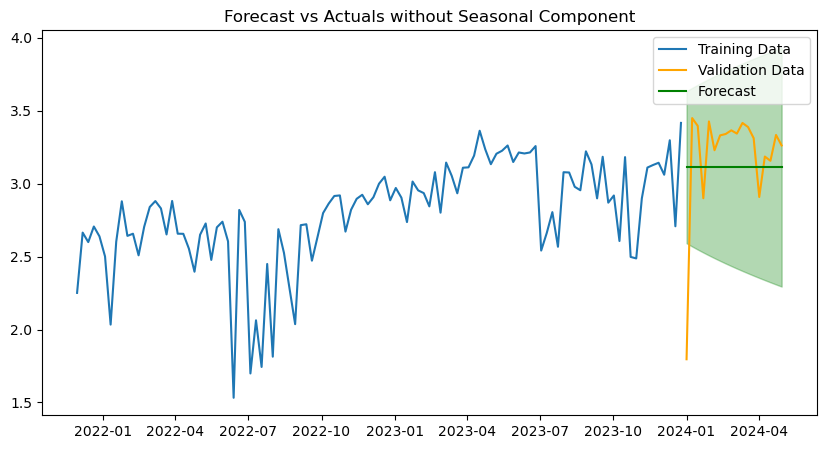

In [95]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the model on the training data without seasonality
model_no_seasonality = SARIMAX(train_data, order=(0, 1, 1), seasonal_order=(0, 0, 0, 52))
results_no_seasonality = model_no_seasonality.fit()

# Forecasting
forecast_no_seasonality = results_no_seasonality.get_forecast(steps=len(validation_data))
forecast_index_no_seasonality = validation_data.index

# Plot forecast against actual values
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Training Data')
plt.plot(validation_data, label='Validation Data', color='orange')
plt.plot(forecast_index_no_seasonality, forecast_no_seasonality.predicted_mean, label='Forecast', color='green')
plt.fill_between(forecast_index_no_seasonality, 
                 forecast_no_seasonality.conf_int().iloc[:, 0], 
                 forecast_no_seasonality.conf_int().iloc[:, 1], 
                 color='green', alpha=0.3)
plt.title('Forecast vs Actuals without Seasonal Component')
plt.legend()
plt.show()


/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


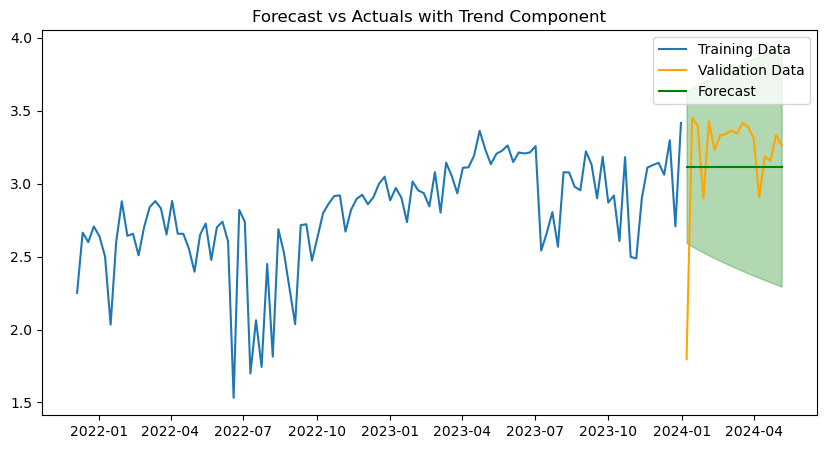

In [17]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit the ARIMA model on the training data with a trend
model_trend = ARIMA(train_data, order=(0, 1, 1))  # Example order (p=1, d=1, q=1)
results_trend = model_trend.fit()

# Forecasting
forecast_trend = results_trend.get_forecast(steps=len(validation_data))
forecast_index_trend = validation_data.index

# Plot forecast against actual values
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Training Data')
plt.plot(validation_data, label='Validation Data', color='orange')
plt.plot(forecast_index_trend, forecast_trend.predicted_mean, label='Forecast', color='green')
plt.fill_between(forecast_index_trend, 
                 forecast_trend.conf_int().iloc[:, 0], 
                 forecast_trend.conf_int().iloc[:, 1], 
                 color='green', alpha=0.3)
plt.title('Forecast vs Actuals with Trend Component')
plt.legend()
plt.show()


ADF test statistic       -2.287764
p-value                   0.175945
# lags used               2.000000
# observations          137.000000
critical value (1%)      -3.479007
critical value (5%)      -2.882878
critical value (10%)     -2.578149
Weak evidence against the null hypothesis. Fail to reject the null hypothesis. Data is non-stationary.
MSE Error: 0.1345208578
RMSE Error: 0.3667708519
MAPE Error: 0.0914629230
Accuracy: 90.8537076991
ADF test statistic       -2.287764
p-value                   0.175945
# lags used               2.000000
# observations          137.000000
critical value (1%)      -3.479007
critical value (5%)      -2.882878
critical value (10%)     -2.578149
Weak evidence against the null hypothesis. Fail to reject the null hypothesis. Data is non-stationary.
MSE Error: 0.1345208578
RMSE Error: 0.3667708519
MAPE Error: 0.0914629230
Accuracy: 90.8537076991
ADF test statistic       -2.287764
p-value                   0.175945
# lags used               2.000000
# o

/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


         index  TREATED WATER PRODUCTION IN ML       Type  Validation  \
0   2021-12-05                        2.251238     Actual         NaN   
1   2021-12-12                        2.664468     Actual         NaN   
2   2021-12-19                        2.599488     Actual         NaN   
3   2021-12-26                        2.706296     Actual         NaN   
4   2022-01-02                        2.639030     Actual         NaN   
..         ...                             ...        ...         ...   
139 2024-08-04                        1.963326     Actual         NaN   
140 2024-08-11                        2.310000  Predicted         NaN   
141 2024-08-18                        2.310000  Predicted         NaN   
142 2024-08-25                        2.310000  Predicted         NaN   
143 2024-09-01                        2.300000  Predicted         NaN   

          Date  
0   2021-12-05  
1   2021-12-12  
2   2021-12-19  
3   2021-12-26  
4   2022-01-02  
..         ...  
139 

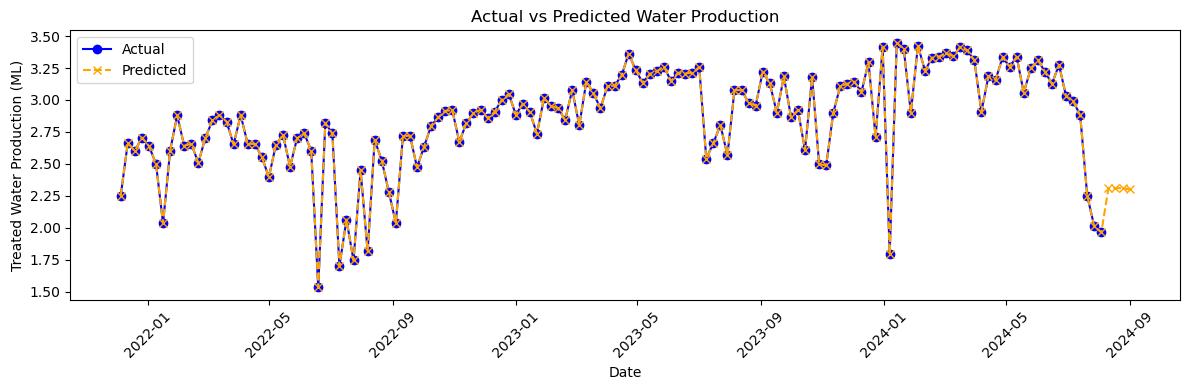

In [53]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse
import pandas as pd
import matplotlib.pyplot as plt

class TSA:
    def __init__(self, df):
        self.df = df
        
    def adf_test(self, valcol):
        result = adfuller(self.df[valcol].dropna(), autolag='AIC')
    
        labels = ['ADF test statistic', 'p-value', '# lags used', '# observations']
        out = pd.Series(result[0:4], index=labels)

        for key, val in result[4].items():
            out[f'critical value ({key})'] = val
        
        print(out.to_string())
    
        if result[1] <= 0.05:
            print("Strong evidence against the null hypothesis. Reject the null hypothesis. Data is stationary.")
            state = "Stationary"
        else:
            print("Weak evidence against the null hypothesis. Fail to reject the null hypothesis. Data is non-stationary.")
            state = "Non-stationary"
        return "Yes" if state == "Stationary" else "No"
    
    def fit_exponential_smoothing(self, valcol):
        train = self.df[self.df.index < '2024-01-07'][valcol]
        test = self.df[(self.df.index >= '2024-01-07') & (self.df.index <= '2024-05-05')][valcol]
        val = self.df[self.df.index > '2024-05-05'][valcol]

        # Fit the model
#         model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()
        model = ExponentialSmoothing(train, trend='mul', seasonal=None).fit()
        predictions = model.forecast(len(test))

        # Calculate error metrics
        error1 = mean_squared_error(test, predictions)
        error2 = rmse(test, predictions)
        error3 = mean_absolute_percentage_error(test, predictions)
        accuracy = (1 - error3) * 100

        print(f'MSE Error: {error1:.10f}')
        print(f'RMSE Error: {error2:.10f}')
        print(f'MAPE Error: {error3:.10f}')
        print(f'Accuracy: {accuracy:.10f}')

        model_results = {
            "Model": "Exponential Smoothing",
            "Stationary": self.adf_test(valcol),
            "X_train": str(len(train)) + " Weeks",
            "X_test": str(len(test)) + " Weeks",
            "X_validation": str(len(val)) + " Weeks",
            "MSE": error1,
            "RMSE": error2,
            "MAPE": error3,
            "Accuracy": round(accuracy, 0)
        }
        return predictions

    def full_data_model(self, valcol):
#         model = ExponentialSmoothing(self.df[valcol], trend='add', seasonal='add', seasonal_periods=12).fit()
        model = ExponentialSmoothing(self.df[valcol], trend='mul', seasonal=None).fit()
        fcast = model.forecast(4).round(2)  # Forecast for next 3 periods

        DF = pd.DataFrame(self.df[valcol])
        DF['Type'] = 'Actual'
        DF_fcast = pd.DataFrame(fcast, columns=[valcol])
        DF_fcast['Type'] = 'Predicted'
        
        final_DF = pd.concat([DF, DF_fcast])
        final_DF = final_DF.reset_index()
        
        predictions_val = self.fit_exponential_smoothing(valcol)
        DF_val = pd.DataFrame(predictions_val, columns=['Validation'])
        final_DF = final_DF.merge(DF_val, left_on='index', right_index=True, how='outer')
        final_DF['Date'] = pd.to_datetime(final_DF['index'])
        
        

        print(final_DF)
        print(final_DF.tail(50))
        
        
        # Plotting the actual and predicted values
        plt.figure(figsize=(12, 4))
        plt.plot(self.df.index, self.df[valcol], label='Actual', color='blue', marker='o')
        plt.plot(final_DF['Date'], final_DF[valcol], label='Predicted', color='orange', linestyle='--', marker='x')
        plt.title('Actual vs Predicted Water Production')
        plt.xlabel('Date')
        plt.ylabel('Treated Water Production (ML)')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        

c1 = TSA(df)
c1.adf_test("TREATED WATER PRODUCTION IN ML")
c1.fit_exponential_smoothing("TREATED WATER PRODUCTION IN ML")
c1.full_data_model("TREATED WATER PRODUCTION IN ML")
